In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

import warnings

warnings.filterwarnings("ignore")


df = pd.read_csv('Drug_Consumption_Quantified.csv')

age = {
    -0.95197: '18-24',
    -0.07854: '25 - 34',
    0.49788: '35 - 44',
    1.09449: '45 - 54',
    1.82213: '55 - 64',
    2.59171: '65+'
}

gender = {
    0.48246: 'Female',
    -0.48246: 'Male'
}

education = {
    -2.43591: 'Left School Before 16 years',
    -1.73790: 'Left School at 16 years',
    -1.43719: 'Left School at 17 years',
    -1.22751: 'Left School at 18 years',
    -0.61113: 'Some College,No Certificate Or Degree',
    -0.05921: 'Professional Certificate/ Diploma',
    0.45468: 'University Degree',
    1.16365: 'Masters Degree',
    1.98437: 'Doctorate Degree',
}

country = {
    -0.09765: 'Australia',
    0.24923: 'Canada',
    -0.46841: 'New Zealand',
    -0.28519: 'Other',
    0.21128: 'Republic of Ireland',
    0.96082: 'UK',
    -0.57009: 'USA'
}

ethnicity = {
    -0.50212: 'Asian',
    -1.10702: 'Black',
    1.90725: 'Mixed-Black/Asian',
    0.12600: 'Mixed-White/Asian',
    -0.22166: 'Mixed-White/Black',
    0.11440: 'Other',
    -0.31685: 'White'
}

usage = {
    'CL0': 'Never Used',
    'CL1': 'Used over a Decade Ago',
    'CL2': 'Used in Last Decade',
    'CL3': 'Used in Last Year',
    'CL4': 'Used in Last Month',
    'CL5': 'Used in Last Week',
    'CL6': 'Used in Last Day',
}

df['Alcohol'] = df['Alcohol'].replace(usage)
df['Amphet'] = df['Amphet'].replace(usage)
df['Amyl'] = df['Amyl'].replace(usage)
df['Benzos'] = df['Benzos'].replace(usage)
df['Caff'] = df['Caff'].replace(usage)
df['Cannabis'] = df['Cannabis'].replace(usage)
df['Choc'] = df['Choc'].replace(usage)
df['Coke'] = df['Coke'].replace(usage)
df['Crack'] = df['Crack'].replace(usage)
df['Ecstasy'] = df['Ecstasy'].replace(usage)
df['Heroin'] = df['Heroin'].replace(usage)
df['Ketamine'] = df['Ketamine'].replace(usage)
df['Legalh'] = df['Legalh'].replace(usage)
df['LSD'] = df['LSD'].replace(usage)
df['Meth'] = df['Meth'].replace(usage)
df['Mushrooms'] = df['Mushrooms'].replace(usage)
df['Nicotine'] = df['Nicotine'].replace(usage)
df['Semer'] = df['Semer'].replace(usage)
df['VSA'] = df['VSA'].replace(usage)

df.drop_duplicates()
df = df.drop_duplicates()

num_cols = df.select_dtypes(include=['float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns





df = df.drop('ID', axis = 1)
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])



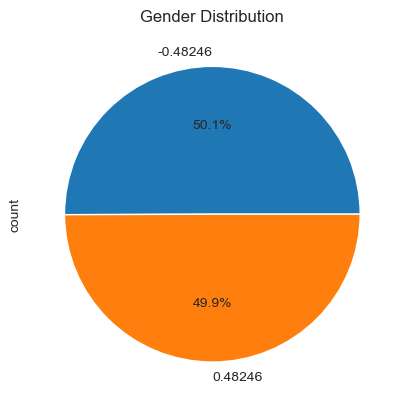

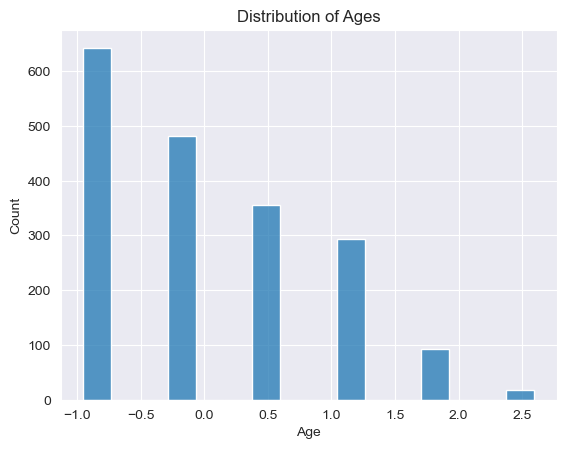

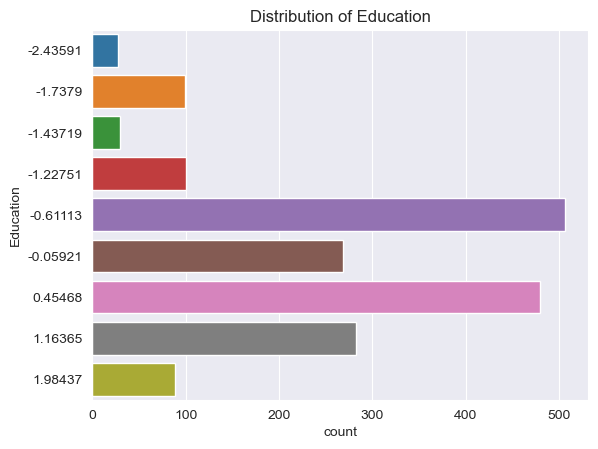

<Figure size 640x480 with 0 Axes>

In [142]:
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()
plt.clf()

df.sort_values(['Age'], inplace=True)
sns.histplot(x='Age', data=df)
plt.title('Distribution of Ages')
plt.show()
plt.clf()

df.sort_values(['Education'], inplace=True)
sns.countplot(y='Education', data=df)
plt.title('Distribution of Education')
plt.show()
plt.clf()

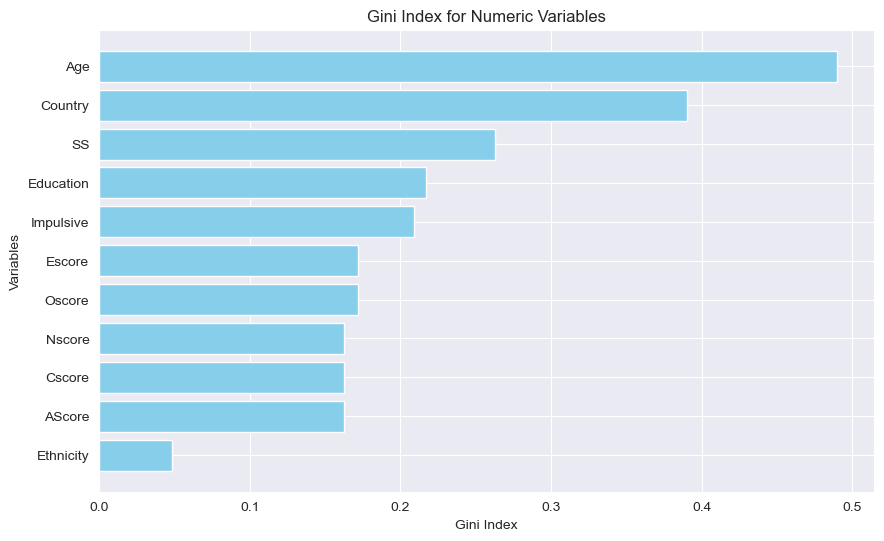

In [143]:
def gini_index_adjusted(data):

    min_value = data.min()
    if min_value < 0:
        shifted_data = data - min_value
    else:
        shifted_data = data


    sorted_data = shifted_data.sort_values().values
    n = len(sorted_data)
    index = np.arange(1, n + 1)
    gini_numerator = np.sum((2 * index - n - 1) * sorted_data)
    gini_denominator = n * np.sum(sorted_data)
    gini = gini_numerator / gini_denominator
    return gini

num_cols = num_cols.drop('Gender')

gini_index_dict = {}
for col in num_cols:
    gini_index_dict[col] = gini_index_adjusted(df[col])

sorted_gini_index = sorted(gini_index_dict.items(), key=lambda x: x[1], reverse=True)

columns = [item[0] for item in sorted_gini_index]
gini_values = [item[1] for item in sorted_gini_index]


plt.figure(figsize=(10, 6))
plt.barh(columns, gini_values, color='skyblue')
plt.xlabel('Gini Index')
plt.ylabel('Variables')
plt.title('Gini Index for Numeric Variables')
plt.gca().invert_yaxis() 
plt.show()


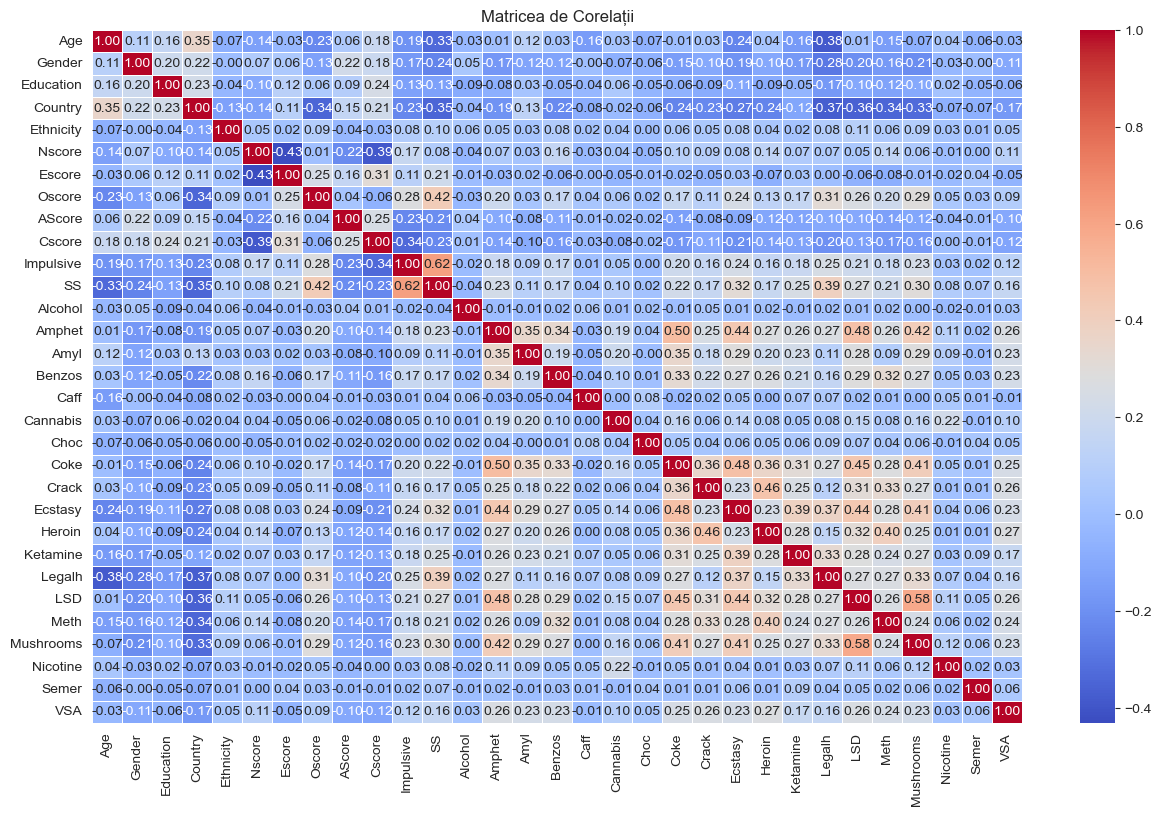

In [144]:
modified_data = df.copy()
for col in modified_data.select_dtypes(include=['object']).columns:
    modified_data[col] = pd.factorize(modified_data[col])[0]

correlation_matrix = modified_data.corr()

plt.figure(figsize=(15, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matricea de Corelații')
plt.show()

Entropia pentru coloana "Age": 2.1824785035855347
Entropia pentru coloana "Gender": 0.9999991870893388
Entropia pentru coloana "Education": 2.6653004744833795
Entropia pentru coloana "Country": 1.6864525642841943
Entropia pentru coloana "Ethnicity": 0.6226613561731851
Entropia pentru coloana "Nscore": 5.1928710675116125
Entropia pentru coloana "Escore": 4.774548530027515
Entropia pentru coloana "Oscore": 4.723374730736702
Entropia pentru coloana "AScore": 4.707942696843576
Entropia pentru coloana "Cscore": 4.807831512203231
Entropia pentru coloana "Impulsive": 2.993270230360119
Entropia pentru coloana "SS": 3.363330774548668
Entropia pentru coloana "Alcohol": 2.1747662152267995
Entropia pentru coloana "Amphet": 2.156991088448018
Entropia pentru coloana "Amyl": 1.4567436115015193
Entropia pentru coloana "Benzos": 2.1514054209351796
Entropia pentru coloana "Caff": 1.3307183271259724
Entropia pentru coloana "Cannabis": 2.6871966635832285
Entropia pentru coloana "Choc": 1.775779957652227
E

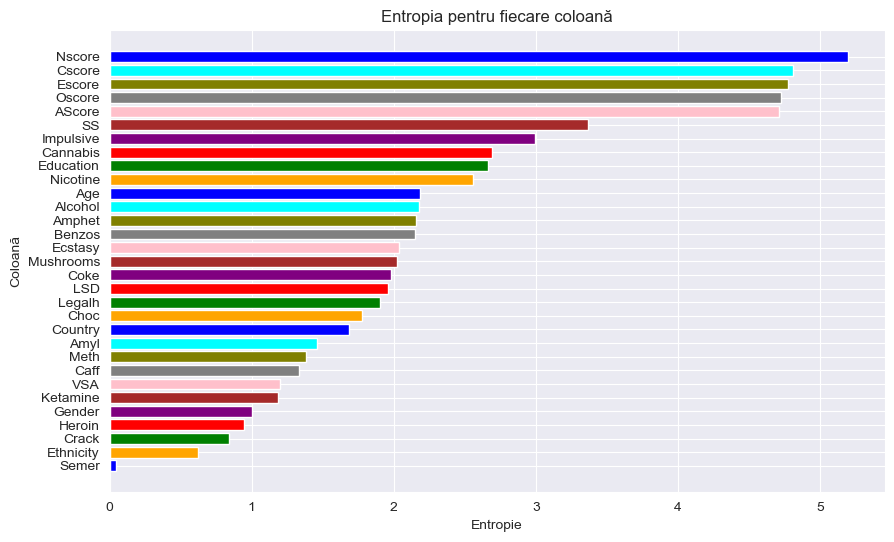

In [145]:
def calculate_entropy(column):
    counts = column.value_counts()
    probabilities = counts / len(column)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

entropy_dict = {}
for col in df.columns:
    entropy_dict[col] = calculate_entropy(df[col])

for col, entropy in entropy_dict.items():
    print(f'Entropia pentru coloana "{col}": {entropy}')

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

sorted_entropy = sorted(entropy_dict.items(), key=lambda x: x[1])

columns = [entry[0] for entry in sorted_entropy]
entropy_values = [entry[1] for entry in sorted_entropy]


plt.figure(figsize=(10, 6))
plt.barh(columns, entropy_values, color=colors)
plt.xlabel('Entropie')
plt.ylabel('Coloană')
plt.title('Entropia pentru fiecare coloană')
plt.show()

Accuracy: 0.4244031830238727
Precision: 0.306066545319939
F1 Score: 0.23863110262591822
              precision    recall  f1-score   support

           0       0.45      0.74      0.56        82
           1       0.48      0.79      0.60       102
           2       0.24      0.14      0.18        57
           3       0.00      0.00      0.00        21
           4       0.50      0.03      0.06        33
           5       0.22      0.06      0.09        36
           6       0.25      0.15      0.19        46

    accuracy                           0.42       377
   macro avg       0.31      0.27      0.24       377
weighted avg       0.36      0.42      0.35       377


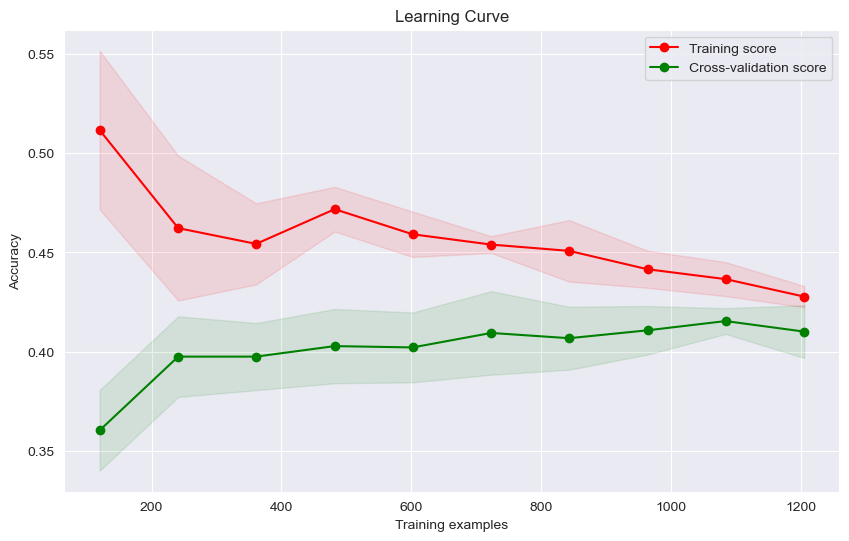

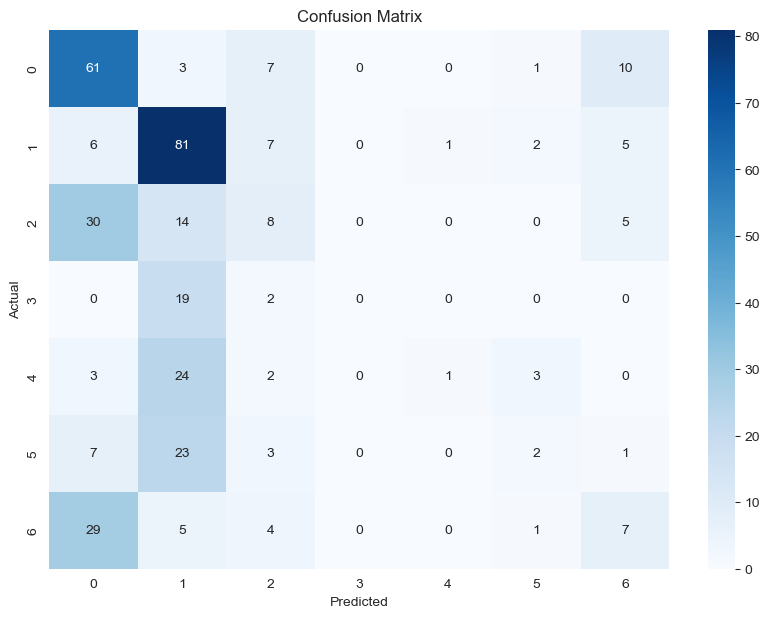

In [191]:
features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
            'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']
X = df[features]
Y = df['Cannabis']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

model = LogisticRegression()
model.fit(X_train,Y_train)

prediction = model.predict(X_test)

from sklearn.metrics import precision_score, f1_score

y_pred = model.predict(X_test)
y_true = Y_test

labels = sorted(list(set(y_true) | set(y_pred)))

precision = precision_score(y_true, y_pred, labels=labels, zero_division=0, average='macro')
f1 = f1_score(y_true, y_pred, labels=labels, zero_division=0, average='macro')
accuracy = accuracy_score(Y_test, prediction)
print(f'Accuracy: {accuracy}')

print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(classification_report(Y_test,prediction))

def plot_learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.show()

plot_learning_curve(model, X_train, Y_train)
conf_matrix = confusion_matrix(Y_test, prediction)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 0.3713527851458886
              precision    recall  f1-score   support

           0       0.50      0.65      0.56        82
           1       0.44      0.57      0.49       102
           2       0.30      0.21      0.25        57
           3       0.00      0.00      0.00        21
           4       0.09      0.06      0.07        33
           5       0.00      0.00      0.00        36
           6       0.39      0.33      0.36        46

    accuracy                           0.37       377
   macro avg       0.25      0.26      0.25       377
weighted avg       0.33      0.37      0.34       377


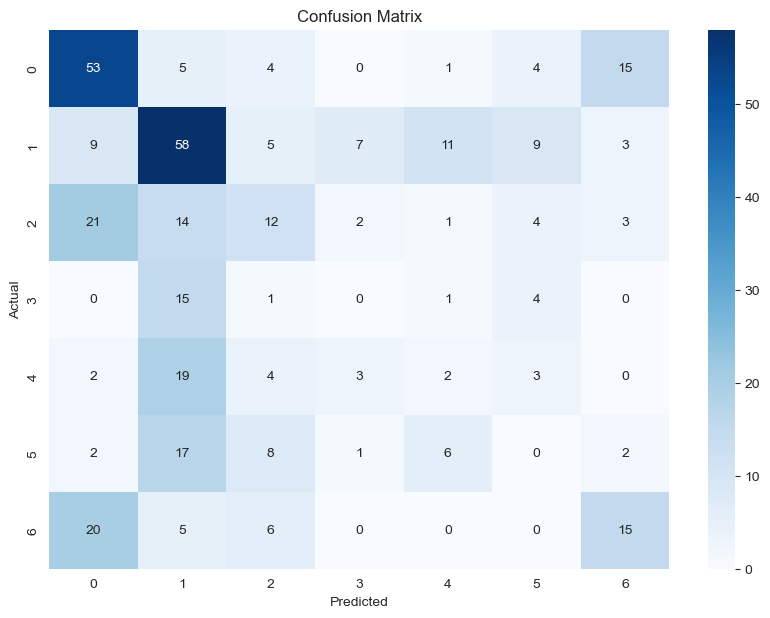

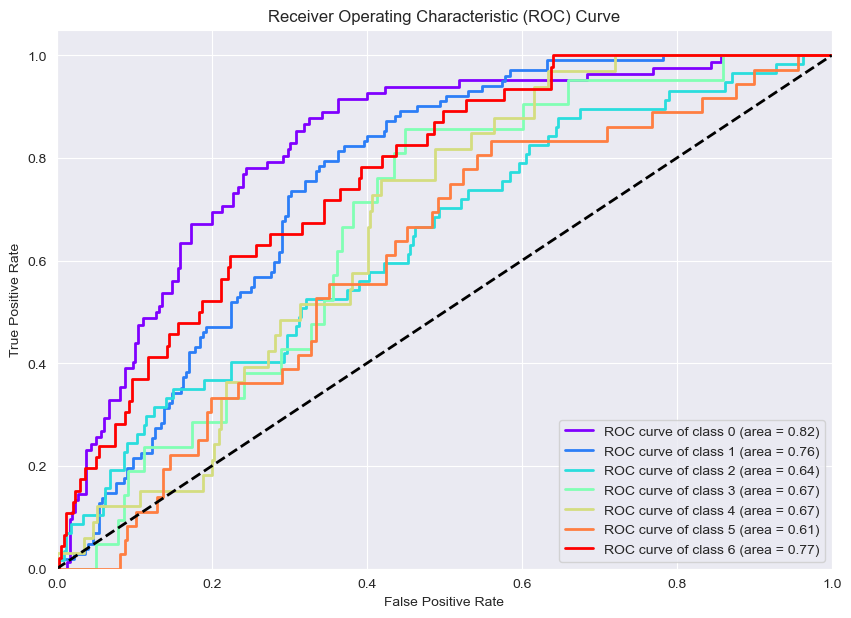

In [147]:
target_variable = 'Cannabis'
features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']


X = df[features]
y = df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)


predictions = model.predict(X_test)
predictions_proba = model.predict_proba(X_test)


accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, predictions))


conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, predictions_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 7))
colors = plt.cm.rainbow(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy RandomForestClassifier: 0.41114058355437666
              precision    recall  f1-score   support

           0       0.46      0.74      0.57        82
           1       0.49      0.75      0.59       102
           2       0.21      0.14      0.17        57
           3       0.00      0.00      0.00        21
           4       0.17      0.06      0.09        33
           5       0.22      0.06      0.09        36
           6       0.24      0.13      0.17        46

    accuracy                           0.41       377
   macro avg       0.26      0.27      0.24       377
weighted avg       0.33      0.41      0.35       377


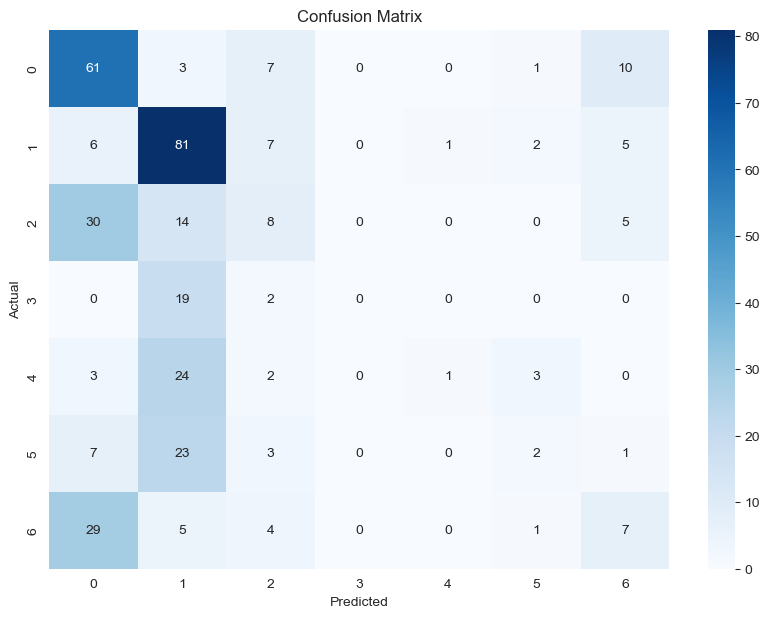

In [150]:
target_variable = 'Cannabis'
features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']


X = df[features]
y = df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)


predictions_rf = model_rf.predict(X_test)


accuracy_rf = accuracy_score(y_test, predictions_rf)
print(f'Accuracy RandomForestClassifier: {accuracy_rf}')

print(classification_report(y_test, predictions_rf))

conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Predicția pentru datele introduse manual: ['Used in Last Day']
Accuracy: 0.4244031830238727
Precision: 0.306066545319939
F1 Score: 0.23863110262591822
              precision    recall  f1-score   support

           0       0.45      0.74      0.56        82
           1       0.48      0.79      0.60       102
           2       0.24      0.14      0.18        57
           3       0.00      0.00      0.00        21
           4       0.50      0.03      0.06        33
           5       0.22      0.06      0.09        36
           6       0.25      0.15      0.19        46

    accuracy                           0.42       377
   macro avg       0.31      0.27      0.24       377
weighted avg       0.36      0.42      0.35       377


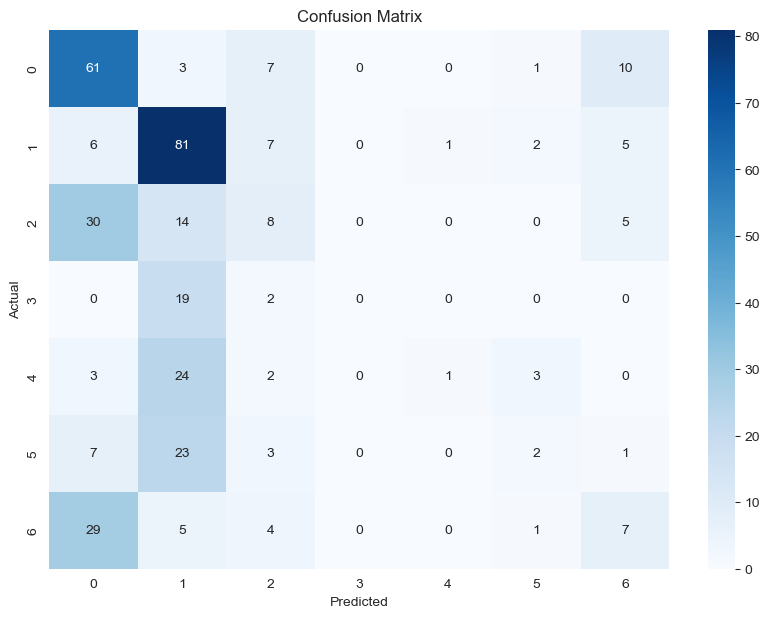

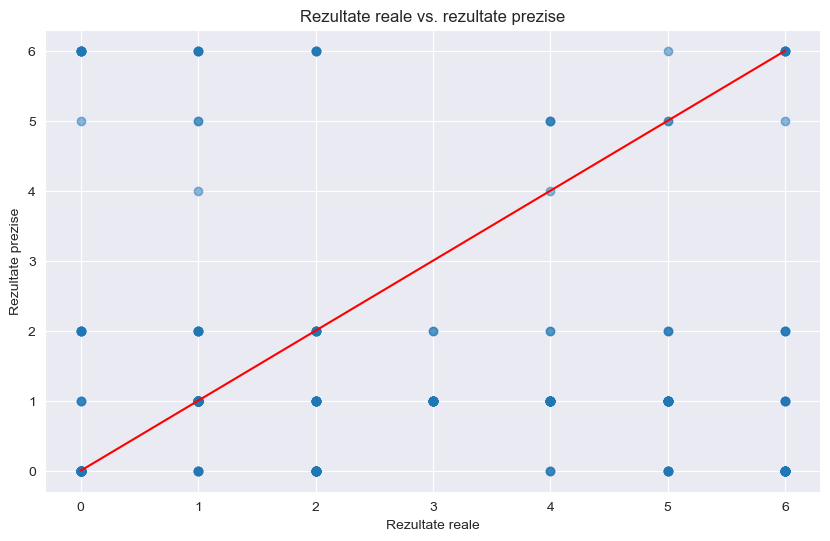

In [189]:
features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']
X = df[features]
Y = df['Cannabis']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, Y_train)


def predict_manual_data():
    manual_data = {
        'Age': 0.49788, #  35-44
        'Gender': 0.48246, #  Female
        'Education': -1.43719, #  Left School at 17 years
        'Country': 0.96082, #  UK
        'Ethnicity': -0.31685, # White
        'Nscore': 0.5, # scor pentru Neuroticism
        'Escore': 0.5, # scor pentru Extraversion
        'Oscore': 0.5, # scor pentru Openness
        'AScore': 0.5, # scor pentru Agreeableness
        'Cscore': 0.5, # scor pentru Conscientiousness
        'Impulsive': 1.5, #scor pentru Impulsivity
        'SS': 1.5 #scor pentru Sensation Seeking
    }

    manual_df = pd.DataFrame([manual_data])

    for col in manual_df.columns:
        if col in label_encoder.classes_:
            manual_df[col] = label_encoder.transform(manual_df[col])


    prediction = model.predict(manual_df)
    print(f"Predicția pentru datele introduse manual: {label_encoder.inverse_transform(prediction)}")


predict_manual_data()


predictions = model.predict(X_test)

precision = precision_score(Y_test, predictions, average='macro')
f1 = f1_score(Y_test, predictions, average='macro')
accuracy = accuracy_score(Y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(classification_report(Y_test, predictions))


conf_matrix = confusion_matrix(Y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions, alpha=0.5)
plt.xlabel('Rezultate reale')
plt.ylabel('Rezultate prezise')
plt.title('Rezultate reale vs. rezultate prezise')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')  
plt.show()